In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
#importing data sets
compensation_2015 = pd.read_csv("Resources/Programs/Compensation_by_County_2015.csv")
compensation_2017 = pd.read_csv("Resources/Programs/Compensation_by_County_2017.csv")
compensation_2020 = pd.read_csv("Resources/Programs/Compensation_by_County_2020.csv")
compensation_2021 = pd.read_csv("Resources/Programs/Compenstion_by_County_2021.csv")
program_users = pd.read_csv("Resources/Programs/Users_by_Program__2010_2021.csv")


What is the Compensation per user throughout the years?

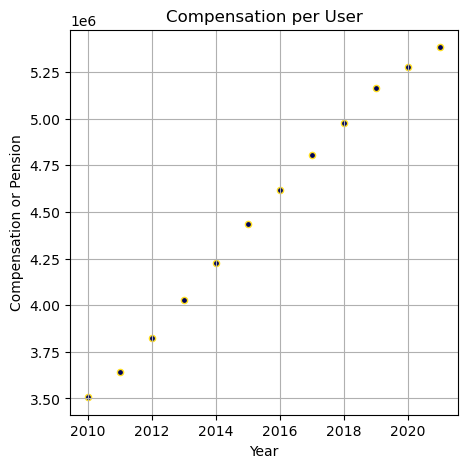

In [166]:
#graph of users
program_users.plot(kind="scatter", x="Year", y="Compensation or Pension", title= "Compensation per User", 
                  color = '#00035b', edgecolor ='#ffdf22', grid = True, figsize = (5,5))
plt.savefig("images/comp_per_user.png")
plt.show()

In [167]:
#merging and renaming columns
compensation_2017 = compensation_2017[['State', 'County', 'Total: Compensation',  'Male Recipients: Compensation OR Pension',
       'Female Recipients: Compensation OR Pension']]
compensation_2015 = compensation_2015[['State', 'County',' Total: Compensation only ',
       ' Males: Compensation OR Pension ',
       ' Females: Compensation OR Pension ']]
compensation_2020 = compensation_2020[['State', 'County Name',
                                       'Total: Disability Compensation Recipients', 
                                       'Male', 'Female']]
compensation_2021 = compensation_2021[['State', 'County Name',
                                       'Total: Disability Compensation Recipients', 
                                       'Male', 'Female']]
compensation_2017 = compensation_2017.rename(columns={"Male Recipients: Compensation OR Pension":"Male Compensation",
                                                        "Female Recipients: Compensation OR Pension":"Female Compensation"})
compensation_2020 =compensation_2020.rename(columns={"County Name": "County", 
                                                     "Total: Disability Compensation Recipients":"Total: Compensation",
                                                    "Male":"Male Compensation",
                                                    "Female":"Female Compensation"})
compensation_2021 =compensation_2021.rename(columns={"County Name": "County", 
                                                     "Total: Disability Compensation Recipients":"Total: Compensation",
                                                    "Male":"Male Compensation",
                                                    "Female":"Female Compensation"})
compensation_2015 = compensation_2015.rename(columns={" Total: Compensation only ":"Total: Compensation",
                                                        " Males: Compensation OR Pension ":"Male Compensation",
                                                     ' Females: Compensation OR Pension ':"Female Compensation"})
combined_compensation = pd.merge(compensation_2015, compensation_2017,
                                 how='outer', on=['County', 'State'])
combined_compensation = combined_compensation.rename(columns={"Total: Compensation_x":"Total: Compensation 2015",
                                                     'Male Compensation_x':"Male Compensation 2015",
                                                             "Female Compensation_x":"Female Compensation 2015",
                                                             "Total: Compensation_y":"Total: Compensation 2017",
                                                            "Male Compensation_y":"Male Compensation 2017",
                                                             "Female Compensation_y":"Female Compensation 2017"})
combined_compensation = pd.merge(combined_compensation, compensation_2020,
                                 how='outer', on=['County', 'State'])
combined_compensation = combined_compensation.rename(columns={"Total: Compensation":"Total: Compensation 2020",
                                                     'Male Compensation':"Male Compensation 2020",
                                                             "Female Compensation":"Female Compensation 2020"})
combined_compensation = pd.merge(combined_compensation, compensation_2021,
                                 how='outer', on=['County', 'State'])
combined_compensation = combined_compensation.rename(columns={"Total: Compensation":"Total: Compensation 2021",
                                                     'Male Compensation':"Male Compensation 2021",
                                                             "Female Compensation":"Female Compensation 2021"})
combined_compensation = combined_compensation.dropna()
combined_compensation = combined_compensation.replace(" ** ",0)
combined_compensation

,State,County,Total: Compensation 2015,Male Compensation 2015,Female Compensation 2015,Total: Compensation 2017,Male Compensation 2017,Female Compensation 2017,Total: Compensation 2020,Male Compensation 2020,Female Compensation 2020,Total: Compensation 2021,Male Compensation 2021,Female Compensation 2021
0,Alabama,Autauga,"1,849","1,657",248,"1,970","1,722",300,2000.0,1687.0,313.0,2077.0,1743.0,334.0
1,Alabama,Baldwin,"3,663","3,671",277,"4,245","4,155",333,5073.0,4648.0,425.0,5174.0,4730.0,444.0
2,Alabama,Barbour,523,524,54,504,501,54,605.0,537.0,68.0,616.0,545.0,71.0
3,Alabama,Bibb,248,293,20,266,296,22,278.0,252.0,26.0,281.0,255.0,26.0
4,Alabama,Blount,660,734,20,601,635,29,771.0,724.0,47.0,771.0,722.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,Wyoming,Teton,102,99,0,128,118,11,156.0,141.0,15.0,159.0,144.0,15.0
3145,Wyoming,Uinta,234,227,23,289,277,21,307.0,280.0,27.0,315.0,286.0,29.0
3146,Wyoming,Washakie,84,83,0,107,105,0,130.0,119.0,11.0,136.0,123.0,13.0
3147,Wyoming,Weston,112,109,0,35,34,0,209.0,198.0,11.0,209.0,197.0,12.0


In [168]:
#removing columns and changing the type
for i in range(len(combined_compensation.index)):
    for j in range(len(combined_compensation.columns)):
        try:
            combined_compensation.iloc[i,j] = combined_compensation.iloc[i,j].replace(",","").strip()
            
        except: 
            pass
combined_compensation["Total: Compensation 2015"] = combined_compensation["Total: Compensation 2015"].astype('float64')
combined_compensation["Male Compensation 2015"] = combined_compensation["Male Compensation 2015"].astype('float64')
combined_compensation["Female Compensation 2015"] = combined_compensation["Female Compensation 2015"].astype('float64')
combined_compensation["Total: Compensation 2017"] = combined_compensation["Total: Compensation 2017"].astype('float64')
combined_compensation["Male Compensation 2017"] = combined_compensation["Male Compensation 2017"].astype('float64')
combined_compensation["Female Compensation 2017"] = combined_compensation["Female Compensation 2017"].astype('float64')
combined_compensation

,State,County,Total: Compensation 2015,Male Compensation 2015,Female Compensation 2015,Total: Compensation 2017,Male Compensation 2017,Female Compensation 2017,Total: Compensation 2020,Male Compensation 2020,Female Compensation 2020,Total: Compensation 2021,Male Compensation 2021,Female Compensation 2021
0,Alabama,Autauga,1849.0,1657.0,248.0,1970.0,1722.0,300.0,2000.0,1687.0,313.0,2077.0,1743.0,334.0
1,Alabama,Baldwin,3663.0,3671.0,277.0,4245.0,4155.0,333.0,5073.0,4648.0,425.0,5174.0,4730.0,444.0
2,Alabama,Barbour,523.0,524.0,54.0,504.0,501.0,54.0,605.0,537.0,68.0,616.0,545.0,71.0
3,Alabama,Bibb,248.0,293.0,20.0,266.0,296.0,22.0,278.0,252.0,26.0,281.0,255.0,26.0
4,Alabama,Blount,660.0,734.0,20.0,601.0,635.0,29.0,771.0,724.0,47.0,771.0,722.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,Wyoming,Teton,102.0,99.0,0.0,128.0,118.0,11.0,156.0,141.0,15.0,159.0,144.0,15.0
3145,Wyoming,Uinta,234.0,227.0,23.0,289.0,277.0,21.0,307.0,280.0,27.0,315.0,286.0,29.0
3146,Wyoming,Washakie,84.0,83.0,0.0,107.0,105.0,0.0,130.0,119.0,11.0,136.0,123.0,13.0
3147,Wyoming,Weston,112.0,109.0,0.0,35.0,34.0,0.0,209.0,198.0,11.0,209.0,197.0,12.0


In [169]:
def get_max_state(title):
    max_male_2015 = combined_compensation.groupby(["State"])[title].idxmax() #gets index of the max
    max2015_male_list = []
    max_male_1 = combined_compensation.groupby(["State"]).max()[title]
    max_male_2 = pd.DataFrame(max_male_1)
    for index in max_male_2015:
        max2015_male_list.append(combined_compensation.loc[index, "County"])#searches for index and attached the county
    max_male_3 = max_male_2.reset_index()
    male_2015_total = max_male_3[title]
    states = max_male_3["State"]

    df = pd.DataFrame({
        "State": states,
        "County": max2015_male_list,
        title: male_2015_total #putting it into a data drame
    })

    return df.sort_values(by=[title], ascending=False)
title1 = 'Total: Compensation 2015' 
title2 = 'Male Compensation 2015'
title3 ='Female Compensation 2015' 
title4 = 'Total: Compensation 2017'
title5 = 'Male Compensation 2017' 
title6 = 'Female Compensation 2017'
title7 ='Total: Compensation 2020' 
title8 = 'Male Compensation 2020'
title9 = 'Female Compensation 2020' 
title10 = 'Total: Compensation 2021'
title11 = 'Male Compensation 2021' 
title12 = 'Female Compensation 2021'
titles = [title1, title2, title3, title4, title5, title6, title7, title8, title9, title10, title11, title12]
dfs = []
for title in titles:
    df = get_max_state(title)
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True) #combining them into a data drame

max_compensation_2015 = get_max_state(title1).head()
max_malecompensation_2015 = get_max_state(title2).head()
max_femalecompensation_2015 = get_max_state(title3).head()
max_compensation_2017 = get_max_state(title4).head()
max_malecompensation_2017 = get_max_state(title5).head()
max_femalecompensation_2017 = get_max_state(title6).head()
max_compensation_2020 = get_max_state(title7).head()
max_malecompensation_2020 = get_max_state(title8).head()
max_femalecompensation_2020 = get_max_state(title9).head()
max_compensation_2021 = get_max_state(title10).head()
max_malecompensation_2021 = get_max_state(title11).head()
max_femalecompensation_2021 = get_max_state(title12).head()

df_all.sort_values(by = ["State"], ascending = True)


,State,County,Total: Compensation 2015,Male Compensation 2015,Female Compensation 2015,Total: Compensation 2017,Male Compensation 2017,Female Compensation 2017,Total: Compensation 2020,Male Compensation 2020,Female Compensation 2020,Total: Compensation 2021,Male Compensation 2021,Female Compensation 2021
75,Alabama,Jefferson,NaN,9233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Alabama,Madison,9822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,Alabama,Madison,NaN,NaN,NaN,NaN,NaN,NaN,11686.0,NaN,NaN,NaN,NaN,NaN
425,Alabama,Madison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1669.0,NaN,NaN,NaN
272,Alabama,Madison,NaN,NaN,NaN,NaN,NaN,1519.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Wyoming,Laramie,NaN,3404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,Wyoming,Laramie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,565.0,NaN,NaN,NaN
402,Wyoming,Laramie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,NaN,NaN,NaN,NaN
504,Wyoming,Laramie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4465.0,NaN,NaN


In [170]:
j = df_all.groupby(["State"]).sum().head()
j = j.sort_values(["Total: Compensation 2015"],ascending = False)
k = df_all.groupby(["County"]).sum()
k = k.sort_values(["Total: Compensation 2015"],ascending = False).head(10)



/var/folders/1l/xk7lzzmd2pz9rmnz18h69nd40000gn/T/ipykernel_13582/3182512101.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  j = df_all.groupby(["State"]).sum().head()
/var/folders/1l/xk7lzzmd2pz9rmnz18h69nd40000gn/T/ipykernel_13582/3182512101.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  k = df_all.groupby(["County"]).sum()


What are the states and Counties with the most funding?

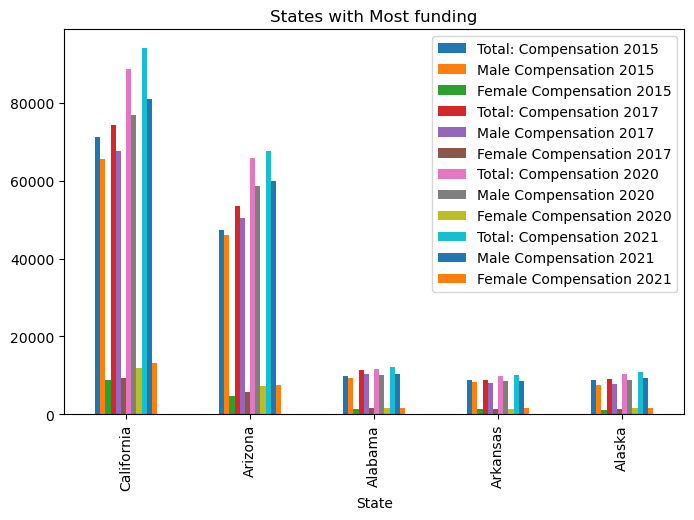

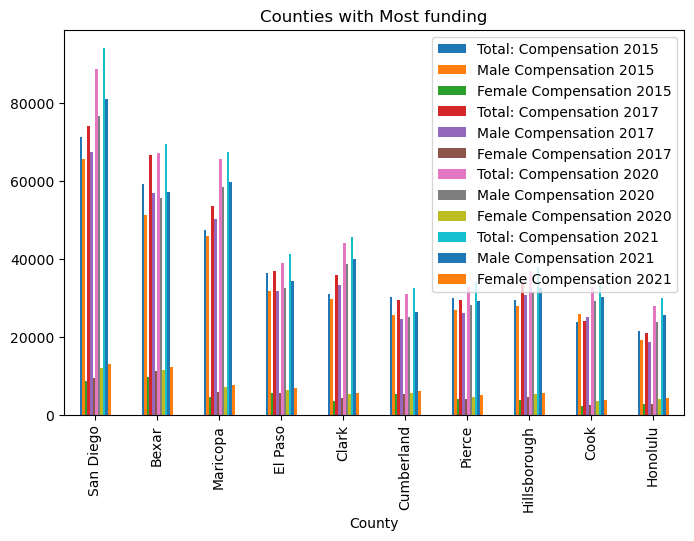

In [171]:
j.plot(kind="bar" ,  figsize= (8,5), title ="States with Most funding")
plt.savefig("images/states_most_funding.png")
k.plot(kind="bar" ,  figsize= (8,5), title = "Counties with Most funding")
plt.savefig("images/counties_most_funding.png")


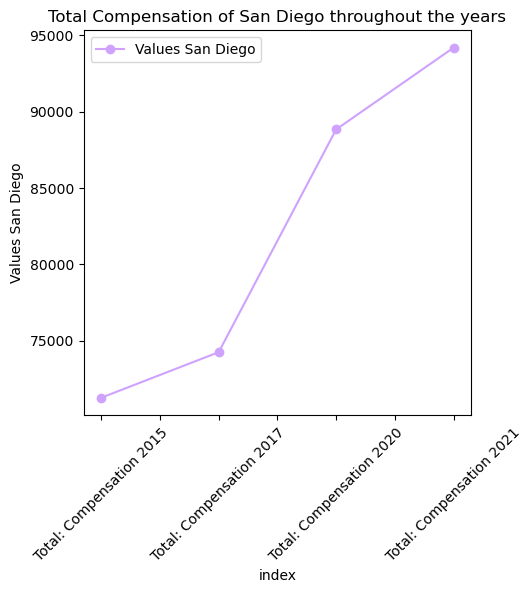

In [172]:
san_diego =combined_compensation.loc[combined_compensation['County']== "San Diego"].T.reset_index()
san_diego = san_diego.rename(columns={222:"Values San Diego"})
total_san_diego = san_diego[san_diego['index'].str.contains('Total: Compensation')]

total_san_diego.plot(kind="line", x="index", y="Values San Diego",
                  ylabel = "Values San Diego", color = '#cea2fd', 
                     marker = "o", figsize = (5,5), rot = 45, title = "Total Compensation of San Diego throughout the years")
plt.savefig("total_san_Diego_years.png")
plt.show()

In [173]:
indexes = []
san_diego_list = [2,5,8,11]

san_diego_values = []
for i in san_diego_list:
        san_diego_values.append(total_san_diego.loc[i, "Values San Diego"])

d = {"Total Compensation":[max_compensation_2015['Total: Compensation 2015'].max(),max_compensation_2017['Total: Compensation 2017'].max(),max_compensation_2020['Total: Compensation 2020'].max(), max_compensation_2021['Total: Compensation 2021'].max()],
    "Male Compensation":[max_malecompensation_2015['Male Compensation 2015'].max(), max_malecompensation_2017['Male Compensation 2017'].max(), max_malecompensation_2020['Male Compensation 2020'].max(), max_malecompensation_2021['Male Compensation 2021'].max()],
    "Female Compensation":[max_femalecompensation_2015['Female Compensation 2015'].max(), max_femalecompensation_2017['Female Compensation 2017'].max(),max_femalecompensation_2020['Female Compensation 2020'].max(), max_femalecompensation_2021['Female Compensation 2021'].max()],
    "San Diego": san_diego_values}


i = ["Max 2015", "Max 2017", "Max 2020", "Max 2021"]

totals = pd.DataFrame(d, i)
totals


,Total Compensation,Male Compensation,Female Compensation,San Diego
Max 2015,71268.0,65708.0,9671.0,71268.0
Max 2017,74249.0,67550.0,11164.0,74249.0
Max 2020,88830.0,76847.0,11983.0,88830.0
Max 2021,94181.0,81036.0,13145.0,94181.0


In [174]:
def get_title(title):
    sd_comp = san_diego[san_diego['index'].str.contains(title)]
    JK = []
    for i in sd_comp.index:
        JK.append(sd_comp.loc[i, "Values San Diego"])
    return JK
total_compensation = get_title('Total: Compensation')
female_compensation = get_title('Female Compensation')
male_compensation = get_title('Male Compensation')
JK = []
k = {
    "SD Total Compensation": total_compensation,
    "SD Male Compensation": male_compensation,
    "SD Female Compensation": female_compensation
}
l = ["Max 2015", "Max 2017", "Max 2020", "Max 2021"]

yay = pd.DataFrame(k, l)
yay

,SD Total Compensation,SD Male Compensation,SD Female Compensation
Max 2015,71268.0,65708.0,8763.0
Max 2017,74249.0,67550.0,9452.0
Max 2020,88830.0,76847.0,11983.0
Max 2021,94181.0,81036.0,13145.0


What were the Max Compensation Values compared to San Diego

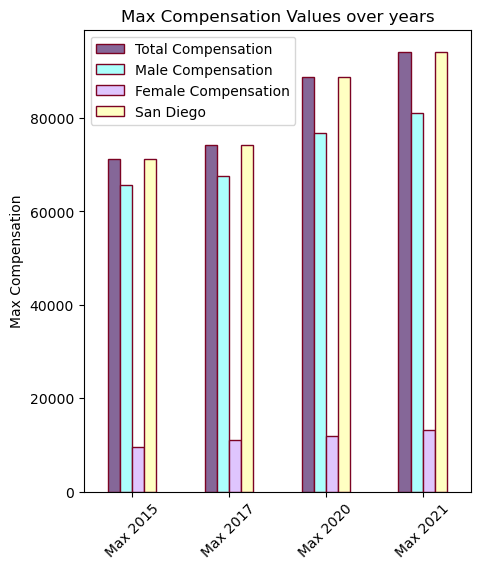

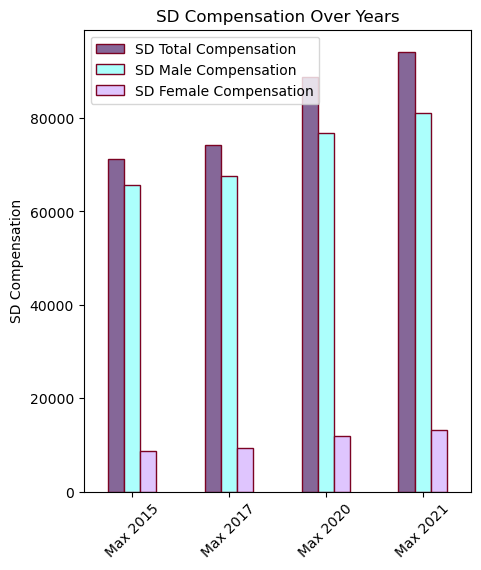

In [178]:
totals.plot(kind="bar", ylabel = "Max Compensation", figsize = (5,6), 
            color ={"#856798","#ffffc2","#acfffc", "#dfc5fe"}, rot = 45, 
            edgecolor ='#7b0323', title = "Max Compensation Values over years")
plt.savefig("images/max_value_years.png")
yay.plot(kind="bar", ylabel = "SD Compensation", figsize = (5,6), 
            color ={"#856798","#ffffc2","#acfffc", "#dfc5fe"}, rot = 45, 
         edgecolor ='#7b0323', title = "SD Compensation Over Years")
plt.savefig("images/sdcomp_years.png")
plt.show()


In [179]:
com_mean = combined_compensation.mean()
com_mean = pd.DataFrame(com_mean)
com_mean

/var/folders/1l/xk7lzzmd2pz9rmnz18h69nd40000gn/T/ipykernel_13582/1371962599.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  com_mean = combined_compensation.mean()


,0
Total: Compensation 2015,1620.284411
Male Compensation 2015,1590.669154
Female Compensation 2015,161.317579
Total: Compensation 2017,1758.544362
Male Compensation 2017,1681.206468
Female Compensation 2017,184.169569
Total: Compensation 2020,1970.604892
Male Compensation 2020,1752.418740
Female Compensation 2020,218.186153
Total: Compensation 2021,2025.468905


In [180]:
sum_of_years = combined_compensation["Total: Compensation 2015"] + combined_compensation["Total: Compensation 2017"]+ combined_compensation["Total: Compensation 2020"]+ combined_compensation["Total: Compensation 2021"]
combined_compensation["Sum of Total Compensation"] = sum_of_years
male_of_years = combined_compensation["Male Compensation 2015"] + combined_compensation["Male Compensation 2017"]+ combined_compensation["Male Compensation 2020"]+ combined_compensation["Male Compensation 2021"]
combined_compensation["Sum of Male Compensation"] = male_of_years
female_of_years = combined_compensation["Female Compensation 2015"] + combined_compensation["Female Compensation 2017"]+ combined_compensation["Female Compensation 2020"]+ combined_compensation["Female Compensation 2021"]
combined_compensation["Sum of Female Compensation"] = female_of_years
combined_compensation

,State,County,Total: Compensation 2015,Male Compensation 2015,Female Compensation 2015,Total: Compensation 2017,Male Compensation 2017,Female Compensation 2017,Total: Compensation 2020,Male Compensation 2020,Female Compensation 2020,Total: Compensation 2021,Male Compensation 2021,Female Compensation 2021,Sum of Total Compensation,Sum of Male Compensation,Sum of Female Compensation
0,Alabama,Autauga,1849.0,1657.0,248.0,1970.0,1722.0,300.0,2000.0,1687.0,313.0,2077.0,1743.0,334.0,7896.0,6809.0,1195.0
1,Alabama,Baldwin,3663.0,3671.0,277.0,4245.0,4155.0,333.0,5073.0,4648.0,425.0,5174.0,4730.0,444.0,18155.0,17204.0,1479.0
2,Alabama,Barbour,523.0,524.0,54.0,504.0,501.0,54.0,605.0,537.0,68.0,616.0,545.0,71.0,2248.0,2107.0,247.0
3,Alabama,Bibb,248.0,293.0,20.0,266.0,296.0,22.0,278.0,252.0,26.0,281.0,255.0,26.0,1073.0,1096.0,94.0
4,Alabama,Blount,660.0,734.0,20.0,601.0,635.0,29.0,771.0,724.0,47.0,771.0,722.0,49.0,2803.0,2815.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,Wyoming,Teton,102.0,99.0,0.0,128.0,118.0,11.0,156.0,141.0,15.0,159.0,144.0,15.0,545.0,502.0,41.0
3145,Wyoming,Uinta,234.0,227.0,23.0,289.0,277.0,21.0,307.0,280.0,27.0,315.0,286.0,29.0,1145.0,1070.0,100.0
3146,Wyoming,Washakie,84.0,83.0,0.0,107.0,105.0,0.0,130.0,119.0,11.0,136.0,123.0,13.0,457.0,430.0,24.0
3147,Wyoming,Weston,112.0,109.0,0.0,35.0,34.0,0.0,209.0,198.0,11.0,209.0,197.0,12.0,565.0,538.0,23.0


/var/folders/1l/xk7lzzmd2pz9rmnz18h69nd40000gn/T/ipykernel_13582/3188362081.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_groupby = combined_compensation.groupby(["State"]).sum().reset_index()


<Axes: xlabel='State', ylabel='Values San Diego'>

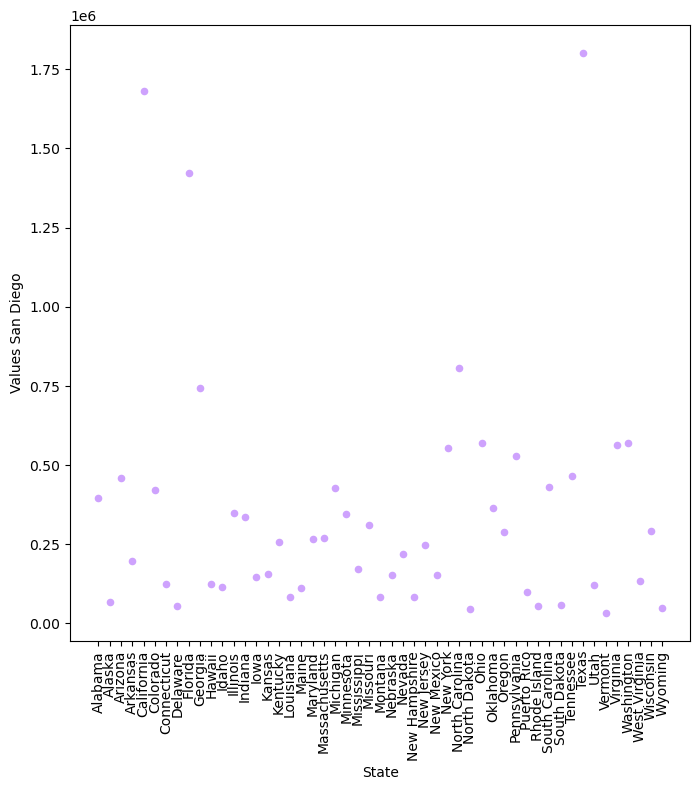

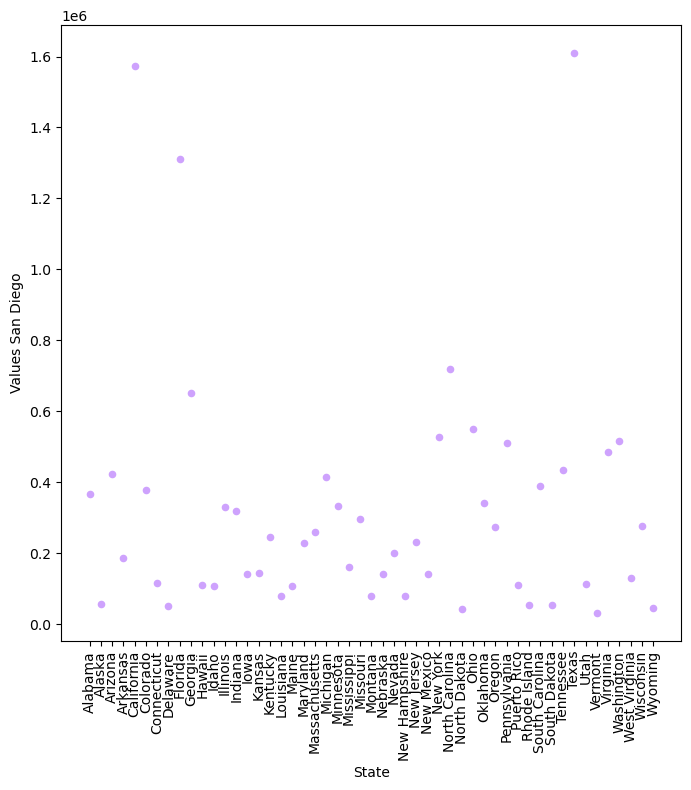

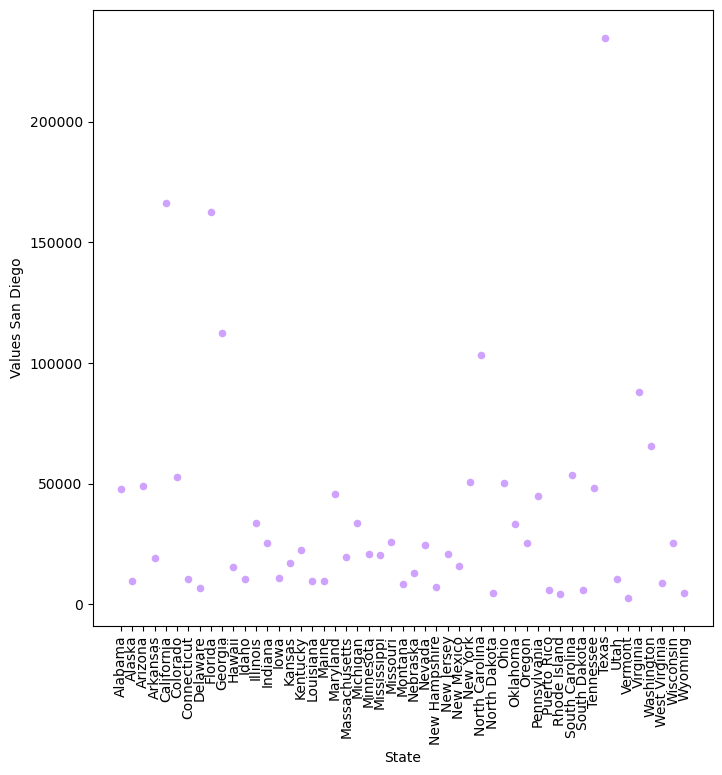

In [153]:
sum_groupby = combined_compensation.groupby(["State"]).sum().reset_index()
sum_groupby
sum_groupby.plot(kind="scatter", x ="State", y="Sum of Total Compensation",
                  ylabel = "Values San Diego", color = '#cea2fd', 
                     marker = "o", figsize = (8,8), rot = 90)
plt.savefig("images/sum_total_years.png")
sum_groupby.plot(kind="scatter", x ="State", y="Sum of Male Compensation",
                  ylabel = "Values San Diego", color = '#cea2fd', 
                     marker = "o", figsize = (8,8), rot = 90)
plt.savefig("images/sum_male_years.png")
sum_groupby.plot(kind="scatter", x ="State", y="Sum of Female Compensation",
                  ylabel = "Values San Diego", color = '#cea2fd', 
                     marker = "o", figsize = (8,8), rot = 90)

/var/folders/1l/xk7lzzmd2pz9rmnz18h69nd40000gn/T/ipykernel_13582/2706529126.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  greater_2015 = greater_2015.groupby(["State"]).sum().reset_index()


<Axes: xlabel='State', ylabel='Values San Diego'>

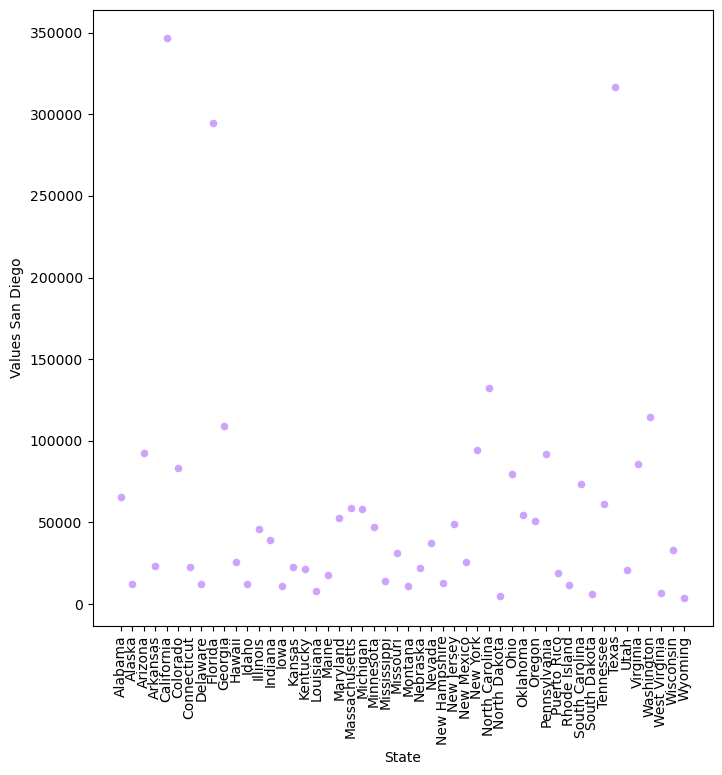

In [162]:
greater_2015 = combined_compensation[combined_compensation["Total: Compensation 2015"] >= 1620.284411]
greater_2015 = greater_2015.groupby(["State"]).sum().reset_index()
greater_2015.plot(kind="scatter", x ="State", y="Total: Compensation 2015",
                  ylabel = "Values San Diego", color = '#cea2fd', 
                     marker = "o", figsize = (8,8), rot = 90)